In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('Advertising.csv')

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


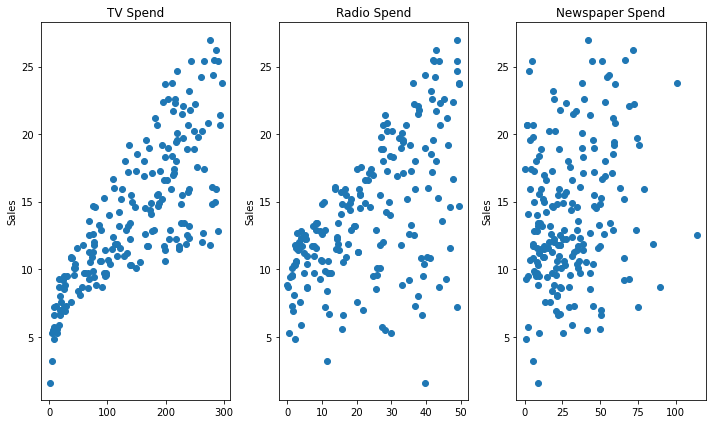

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')
plt.tight_layout()

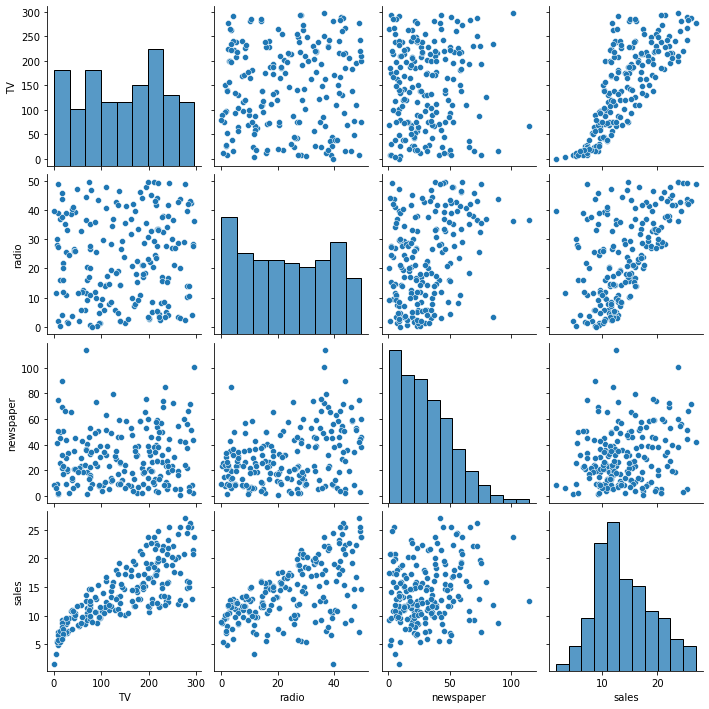

In [9]:
sns.pairplot(df)

In [13]:
X = df.drop('sales', axis=1)
y = df['sales']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

In [2]:
from sklearn.linear_model import LinearRegression

In [14]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
test_predict = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='sales', ylabel='Count'>

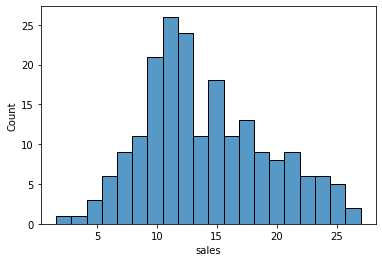

In [23]:
sns.histplot(data=df, x='sales', bins=20)

In [25]:
mean_absolute_error(y_test, test_predict)

1.3534128042740405

In [28]:
np.sqrt(mean_squared_error(y_test, test_predict)) #RMSE

1.7700411267883216

In [30]:
test_residuals = y_test - test_predict

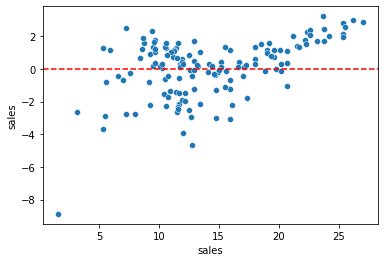

In [34]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, linestyle='--', color='red')

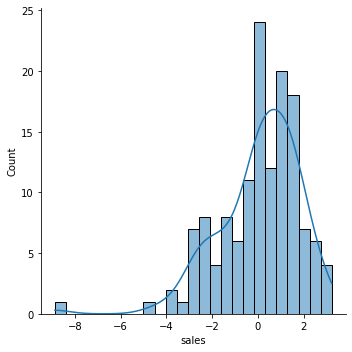

In [36]:
sns.displot(test_residuals, bins=25, kde=True)

In [38]:
import scipy as sp

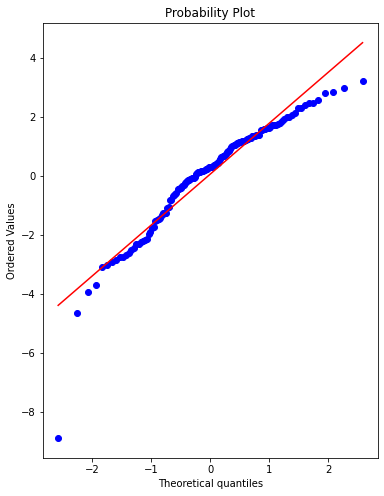

In [39]:
fig, ax = plt.subplots(figsize=(6,8))

_ = sp.stats.probplot(test_residuals, plot=ax)

In [3]:
final_model = LinearRegression()

In [15]:
final_model.fit(X, y)

LinearRegression()

In [17]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [19]:
y_hat = final_model.predict(X)


Text(0.5, 1.0, 'Newspaper Spend')

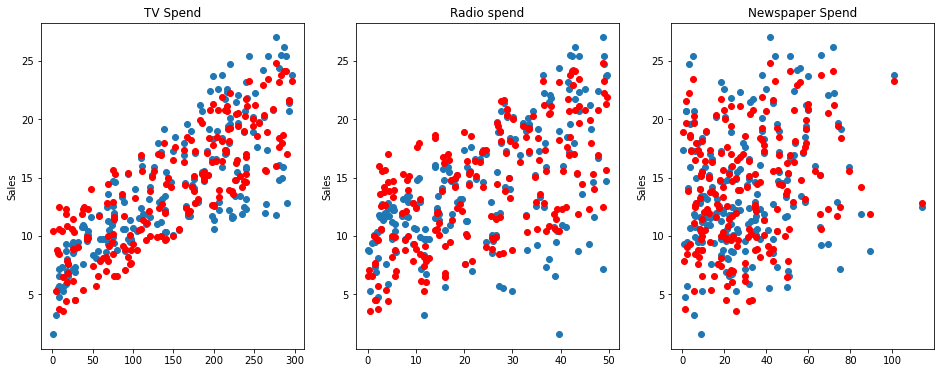

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

In [22]:
from joblib import dump,load

In [24]:
dump(final_model, 'fina_sales_model.joblib')

['fina_sales_model.joblib']

In [26]:
loaded_model = load("fina_sales_model.joblib")

In [27]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149, 22, 12]]

In [29]:
loaded_model.predict(campaign)

C:\Users\Home\anaconda3\envs\UDEMY_ML_NEW\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])